In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import tweepy


import warnings

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
consumer_key= "7VHsv3d67YfHKLrRjplMRBJa0"
consumer_secret= "ZltYoVKttmVFZ2ZrsorQu5CqDpfhHlBZj07JoDMzNgrcRdApVj"
access_token= "1151690055733276673-AMtLepEP9DSYD5lGP5O9FnfUgLfcUB"
access_token_secret= "3y45eSHO6KQz00vCNTIRs7f3erJprvqo5VDIWnwZiBSvG"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [10]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("(RT)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [26]:
# Create a custom search term and define the number of tweets
search_term = "Jagat Sinema Bumilangit"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-07-29').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [27]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.2033333333333333,
 TextBlob("JesuaJCR Full list of main cast from Jagat Sinema Bumilangit Phase 1 the first Cinematic Universe from Indonesian comic books publi"))

In [28]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.2033333333333333,
 'JesuaJCR Full list of main cast from Jagat Sinema Bumilangit Phase 1 the first Cinematic Universe from Indonesian comic books publi']

In [29]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

In [30]:
sentiment_df.tail()

,polarity,tweet
81,0.000000,After Marvel Universe its time to support Jaga...
82,-1.000000,dahnvers JAGAT SINEMA BUMILANGIT IS ABOUT TO B...
83,-1.000000,JAGAT SINEMA BUMILANGIT IS ABOUT TO BE FUCKING...
84,0.433333,Cinematic universe jagat sinema Semoga Bumilan...
85,0.375000,In 2008 IronMan successfully started the Marve...


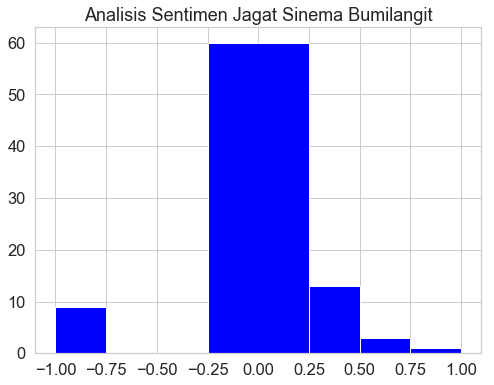

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Analisis Sentimen Jagat Sinema Bumilangit")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Analisis Sentimen Jagat Sinema Bumilangit")
plt.show()

In [23]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

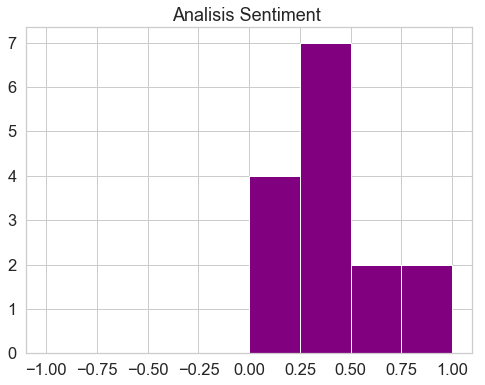

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Analisis Sentiment ")
plt.show()